In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import fastf1
import fastf1.plotting

In [7]:
schedule = fastf1.get_event_schedule(2021)


In [8]:
import matplotlib as mpl
year = 2021
wknd = 9
ses = 'R'
driver = 'RIC'
colormap = mpl.cm.plasma

In [9]:
session = fastf1.get_session(year, wknd, ses)
weekend = session.event
session.load()
lap = session.laps.pick_driver(driver).pick_fastest()

# Get telemetry data
x = lap.telemetry['X']              # values for x-axis
y = lap.telemetry['Y']              # values for y-axis
color = lap.telemetry['Speed']      # value to base color gradient on

core           INFO 	Loading data for Austrian Grand Prix - Race [v3.3.1]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No c

In [10]:
import numpy as np
#Now, we create a set of line segments so that we can color them individually. This creates the points as a N x 1 x 2 array so that we can stack points together easily to get the segments. The segments array for line collection needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

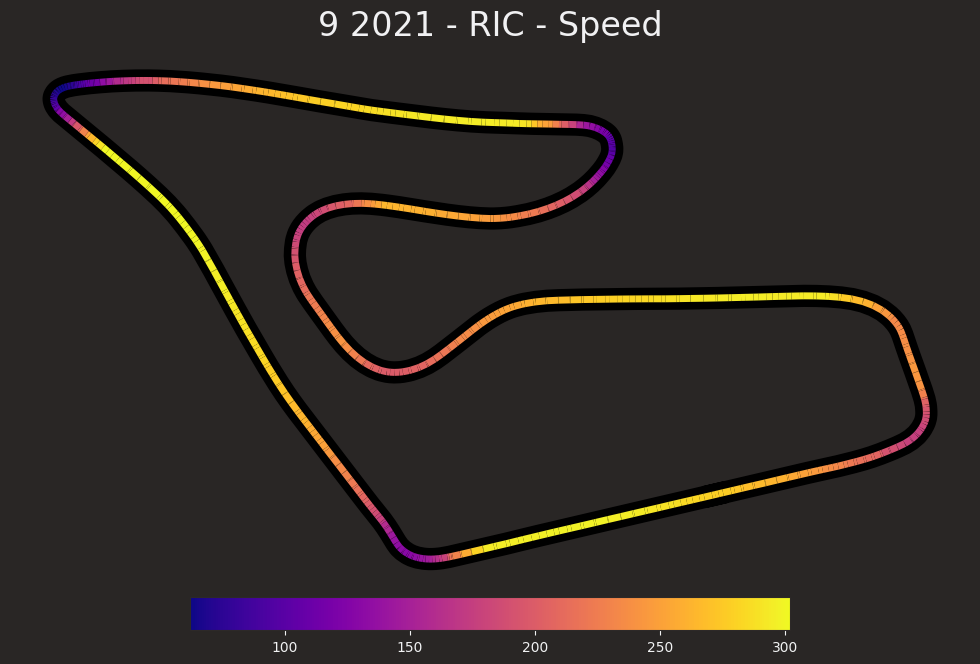

In [12]:
from matplotlib.collections import LineCollection
# We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig.suptitle(f'{weekend.name} {year} - {driver} - Speed', size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')


# After this, we plot the data itself.
# Create background track line
ax.plot(lap.telemetry['X'], lap.telemetry['Y'],
        color='black', linestyle='-', linewidth=16, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm,
                    linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)


# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap,
                                   orientation="horizontal")


# Show the plot
plt.show()

start coding myself

In [2]:
aus_2024=fastf1.get_session(2024,'australia','r')

req         WARNING 	DEFAULT CACHE ENABLED! (481.2 MB) C:\Users\haryo\AppData\Local\Temp\fastf1


In [4]:
aus_2024.load()

core           INFO 	Loading data for Australian Grand Prix - Race [v3.3.1]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No

In [39]:
alo_lap=pd.DataFrame()
rus_lap=pd.DataFrame()
for i in range(50,58):
    alo_lap_s=aus_2024.laps.pick_driver('ALO').pick_lap(i).get_telemetry()
    rus_lap_s=aus_2024.laps.pick_driver('RUS').pick_lap(i).get_telemetry()
    alo_lap_s['lapNumber']=i
    rus_lap_s['lapNumber']=i
    alo_lap=pd.concat([alo_lap,alo_lap_s])
    rus_lap=pd.concat([rus_lap,rus_lap_s])


core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core      

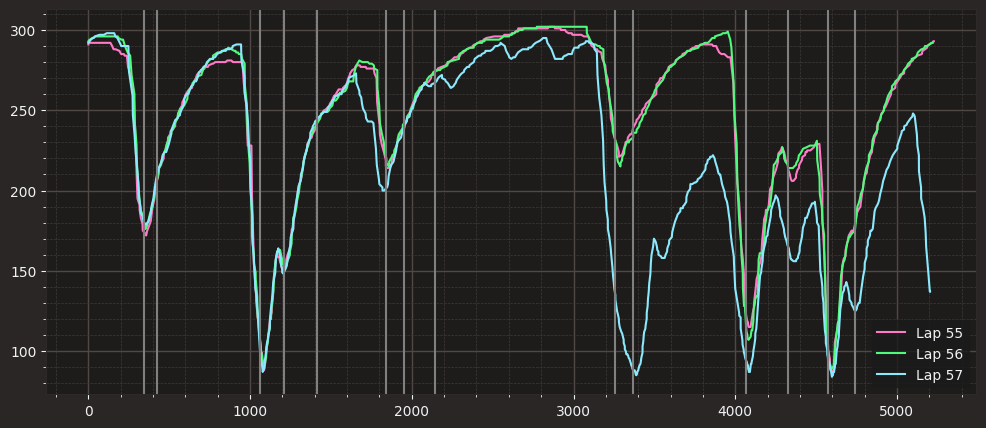

In [56]:
fastf1.plotting.setup_mpl()

fig,ax=plt.subplots(figsize=(12,5))
for i in range(55,58):
    ax.plot(alo_lap[alo_lap['lapNumber']==i]['Distance'],alo_lap[alo_lap['lapNumber']==i]['Speed'],label=f'Lap {i}')
for i,dist in enumerate(aus_2024.get_circuit_info().corners['Distance']):
    ax.axvline(x=dist,color='gray')
ax.legend()
plt.show()

In [47]:
aus_2024.get_circuit_info().corners

,X,Y,Number,Letter,Angle,Distance
0,-3650.594482,1193.784180,1,,-176.632730,343.852594
1,-3555.053223,1992.750244,2,,-1.517007,425.515181
2,-7194.970215,7101.942383,3,,162.258315,1060.244502
3,-5878.734375,7709.864746,4,,-23.426263,1212.127634
4,-5870.662598,9676.805664,5,,159.215959,1411.620746
5,-2280.641357,11861.559570,6,,96.736266,1837.848012
6,-1296.382446,11398.008789,7,,-104.065903,1949.170872
7,502.412537,10576.311523,8,,39.145642,2145.624704
8,2838.843750,798.959839,9,,-101.197334,3256.313095
9,3973.896484,855.019897,10,,73.476771,3367.796645


In [4]:
ham_2021=pd.DataFrame(bahrain.laps).query("Driver in ['HAM','VER']")[['LapTime','Driver','Sector1Time','Sector2Time','Sector3Time','Compound']].melt(id_vars=['Compound','Driver','LapTime'],value_vars=['Sector1Time','Sector2Time','Sector3Time'],var_name='Sectors',value_name='Time')

<Axes: xlabel='Sectors', ylabel='Time'>

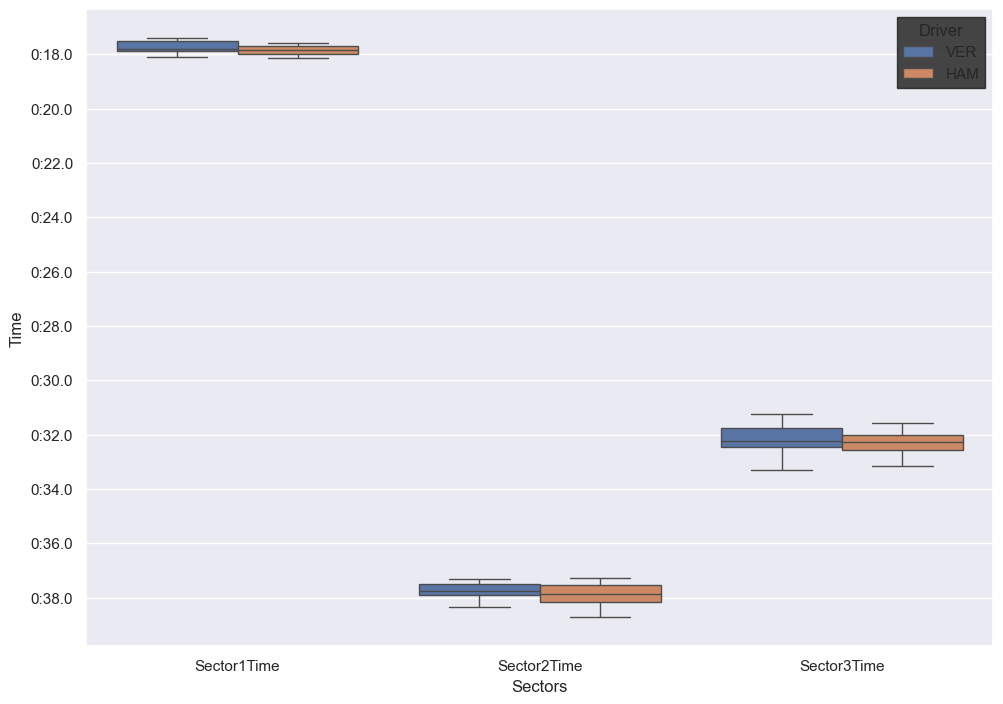

In [68]:
sns.boxplot(data=ham_2021.query('Compound != "SOFT"'),x='Sectors',y='Time',hue='Driver',showfliers=False)

<Axes: xlabel='Compound', ylabel='LapTime'>

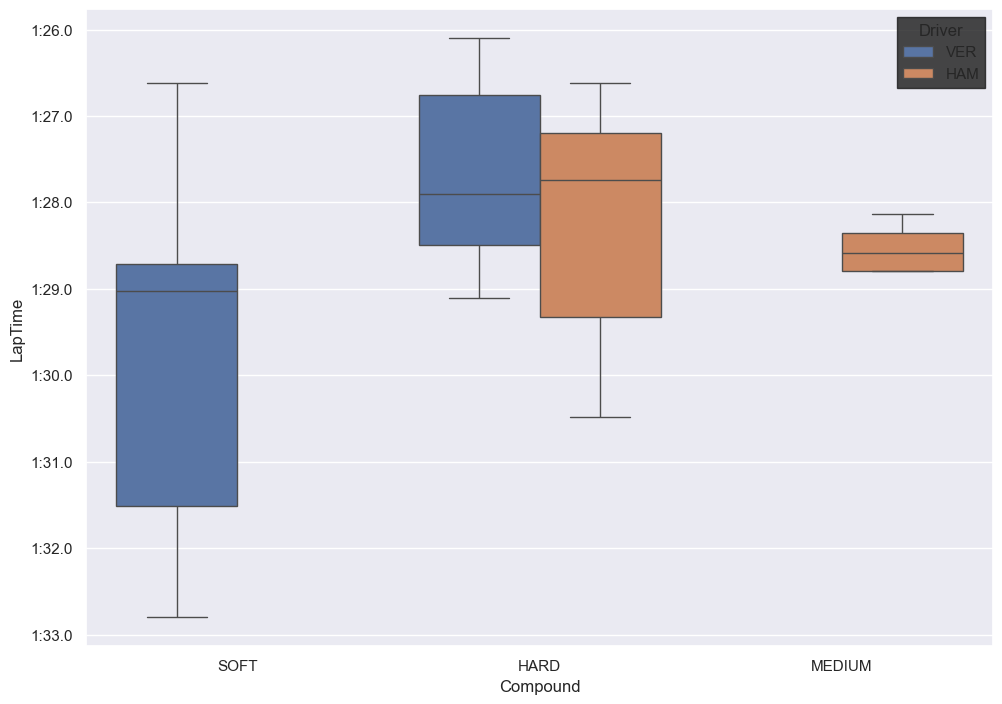

In [75]:
sns.boxplot(data=ham_2021,x='Compound',y='LapTime',hue='Driver',showfliers=False)

<Axes: xlabel='Driver', ylabel='LapTime'>

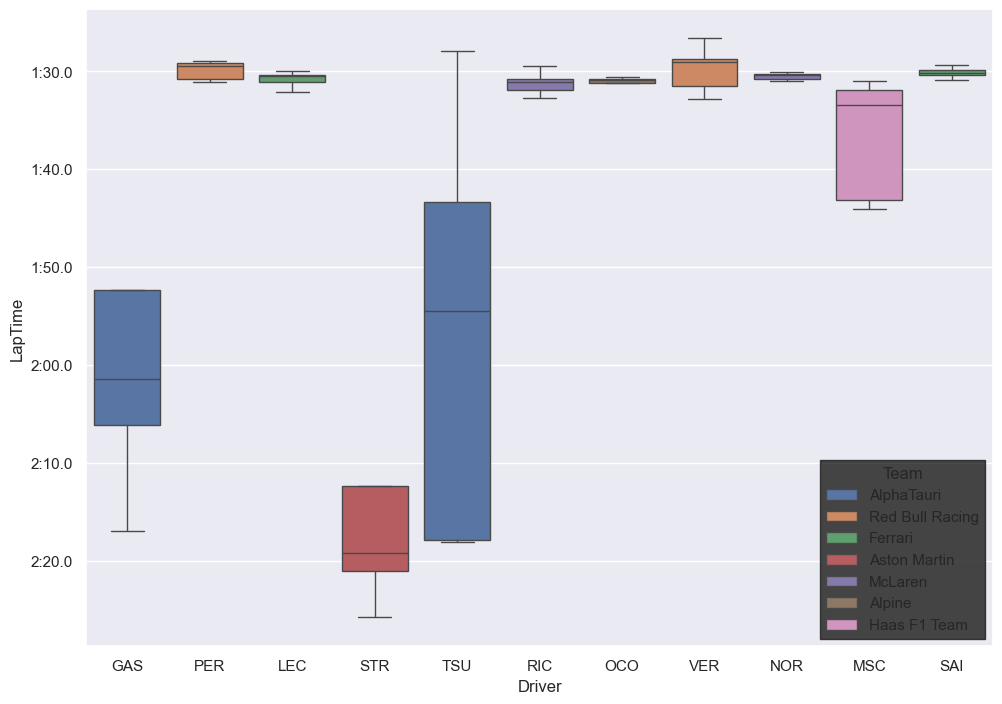

In [60]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data=bahrain.laps.query('Compound == "SOFT"'),x='Driver',y='LapTime',hue='Team',showfliers=False)

In [278]:
hamilton_hard=pd.DataFrame()
verstappen_hard=pd.DataFrame()
for i in range(1,int(max(bahrain.laps.LapNumber)+1)):
    if (bahrain.laps.pick_driver('HAM').pick_lap(i).Compound=='HARD').tolist()[0]:
        hamilton=pd.DataFrame(bahrain.laps.pick_driver('HAM').pick_lap(i).get_telemetry())
        
        hamilton['LapNumber']=i
        hamilton_hard=pd.concat([hamilton_hard,hamilton])
    
    if (bahrain.laps.pick_driver('VER').pick_lap(i).Compound=='HARD').tolist()[0]:
        verstappen=pd.DataFrame(bahrain.laps.pick_driver('VER').pick_lap(i).get_telemetry())

        verstappen['LapNumber']=i
        
        verstappen_hard=pd.concat([verstappen_hard,verstappen])


core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core      

In [279]:
verstappen_hard=verstappen_hard.query("DRS in [0,1,2,3,8]")
hamilton_hard=hamilton_hard.query("DRS in [0,1,2,3,8]")

In [280]:
hamilton_hard['miniSect']=hamilton_hard['RelativeDistance'].apply(lambda x: int(x/(1/25)))
verstappen_hard['miniSect']=verstappen_hard['RelativeDistance'].apply(lambda x: int(x/(1/25)))

In [281]:
hamilton_hard=hamilton_hard[['Speed','miniSect']].groupby('miniSect').mean()
hamilton_hard['drv']='HAM'
hamilton_hard['drv_id']=2
verstappen_hard=verstappen_hard[['Speed','miniSect']].groupby('miniSect').mean()
verstappen_hard['drv']='VER'
verstappen_hard['drv_id']=1

In [282]:
df=pd.concat([hamilton_hard,verstappen_hard])
df[df.groupby('miniSect')['Speed'].transform(max) == df['Speed']].sort_index()

C:\Users\haryo\AppData\Local\Temp\ipykernel_22212\1185998194.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df[df.groupby('miniSect')['Speed'].transform(max) == df['Speed']].sort_index()


,Speed,drv,drv_id
miniSect,,,
0,219.601626,HAM,2
1,197.392778,VER,1
2,196.968012,VER,1
3,255.122093,VER,1
4,268.858751,VER,1
5,283.429806,VER,1
6,162.485268,VER,1
7,181.451453,VER,1
8,264.213582,VER,1


In [283]:
dfSpeed=df.reset_index().sort_values('Speed').drop_duplicates(subset='miniSect', keep='last').sort_values('miniSect').reset_index(drop=True)
listProp=dfSpeed[['drv']].value_counts(normalize=True).tolist()

In [284]:
dfSpeed[['drv']].value_counts(normalize=True).tolist()

[0.96, 0.04]

In [285]:
max(bahrain.laps.LapNumber)

58.0

In [286]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colormaps
from matplotlib.collections import LineCollection

import fastf1


#session = fastf1.get_session(2021, 'Austrian Grand Prix', 'Q')
#session.load()

#lap = session.laps.pick_fastest()
#tel = lap.get_telemetry()

In [287]:
single_lap = pd.DataFrame(bahrain.laps.pick_fastest().get_telemetry())
single_lap['miniSect']=single_lap['RelativeDistance'].apply(lambda x: int(x/(1/25)))
single_lap=single_lap.merge(dfSpeed,on='miniSect')


In [298]:
import math
def rotate_matrix (x, y, angle, x_shift=0, y_shift=0, units="DEGREES"):
    """
    Rotates a point in the xy-plane counterclockwise through an angle about the origin
    https://en.wikipedia.org/wiki/Rotation_matrix
    :param x: x coordinate
    :param y: y coordinate
    :param x_shift: x-axis shift from origin (0, 0)
    :param y_shift: y-axis shift from origin (0, 0)
    :param angle: The rotation angle in degrees
    :param units: DEGREES (default) or RADIANS
    :return: Tuple of rotated x and y
    """

    # Shift to origin (0,0)
    x = x - x_shift
    y = y - y_shift

    # Convert degrees to radians
    if units == "DEGREES":
        angle = math.radians(angle)

    # Rotation matrix multiplication to get rotated x & y
    xr = (x * math.cos(angle)) - (y * math.sin(angle)) + x_shift
    yr = (x * math.sin(angle)) + (y * math.cos(angle)) + y_shift

    return xr, yr

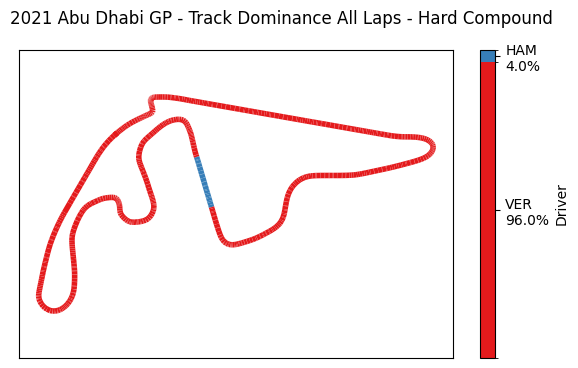

In [301]:
x,y=rotate_matrix(single_lap['X'].values,single_lap['Y'].values,280)

#x = np.array(single_lap['X'].values)
#y = np.array(single_lap['Y'].values)


points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_avg=single_lap['drv_id'].to_numpy().astype(float)
#compound = single_lap['Fastest_compound_int'].to_numpy().astype(float)

cmap = colormaps['Set1']
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_avg)
lc_comp.set_linewidth(4)


fig,ax=plt.subplots(figsize=(7,4))
    

fig.suptitle(
        f"2021 Abu Dhabi GP - Track Dominance All Laps - Hard Compound"
    )
        
ax.add_collection(lc_comp)
ax.axis('equal')
ax.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

    
bounds = [0,max(listProp)*10,10]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N-7)
#x=LineCollection(boundaries, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
#img = plt.imshow(a, cmap=mycmap, norm=norm)
#cax = plt.axes([0.1, 0.1, 0.8, 0.1])
cbar=fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=norm),ax=ax,spacing='proportional', label='Driver')
cbar.set_ticks([(listProp[0]*10)/2,(listProp[0]+((1-listProp[0])/2))*10])
cbar.set_ticklabels([f'VER\n{listProp[0]*100}%', f'HAM\n{listProp[1]*100}%'])
plt.show()